In [50]:
#画像を表現するクラスをロード
from PIL import Image
import numpy as np
#画像をsampleを開く
img = Image.open('image_shiba.jpg')

# グレースケールに変換
gray_img = img.convert('L')
gray_img.save('sample-gray.jpg')

height, width = gray_img.size
# 画像を配列に変換
img_pixels = np.array([[gray_img.getpixel((j,i)) for j in range(height)] for i in range(width)])

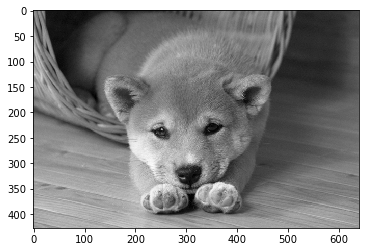

In [51]:
import matplotlib.pyplot as plt
plt.imshow(img_pixels,'gray')
plt.show()

In [52]:
from math import *
def gaussian(x, y, sigma):
    return 1 / (2*pi*sigma**2) * exp(- (x**2 + y**2) / 2*sigma**2)

In [53]:
for x in range(3):
    for y in range(3):
        print((x-1, y-1))

(-1, -1)
(-1, 0)
(-1, 1)
(0, -1)
(0, 0)
(0, 1)
(1, -1)
(1, 0)
(1, 1)


In [54]:
height, width = img_pixels.shape
N = 20
sigma = 5.0
average_filter = np.ones(N**2).reshape((N, N)) / N**2
gaussian_filter = np.array([gaussian(x-5, y-5, sigma) for x in range(11) for y in range(11)]).reshape((11, 11))

In [56]:
gaussian_filter.shape

(11, 11)

In [57]:
# フィルタをかけた後の画像の高さと幅
new_height = height - average_filter.shape[0] + 1
new_width = width - average_filter.shape[1] + 1

In [58]:
import matplotlib.pyplot as plt
def filter(img, filt):
    height = img.shape[0]
    width = img.shape[1]
    
    new_height = height - filt.shape[0] + 1
    new_width = width - filt.shape[1] + 1
    
    new_image = np.ones(new_height * new_width).reshape((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            point = img[i : i + filt.shape[0], j : j + filt.shape[1]] * filt
            new_image[i, j] = np.sum(point, axis=None)
    plt.imshow(new_image, 'gray')
    plt.show()

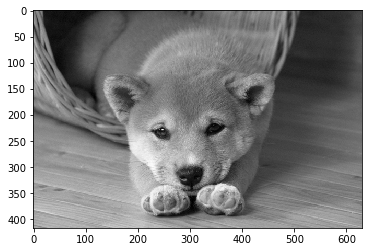

In [59]:
filter(img_pixels, gaussian_filter)